<a href="https://colab.research.google.com/github/plaban1981/TMLC/blob/main/DMSP_Particle_Precipitate_Flux_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Mount Google Drive in colab

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


##🧾Description: 


We advance the modeling capability of electron particle precipitation from the magnetosphere to the ionosphere through a new database and use of deep learning (DL) tools to gain utility from those data. We have compiled, curated, analyzed, and made available a new and more capable database of particle precipitation data that includes 51 satellite years of Defense Meteorological Satellite Program (DMSP) observations temporally aligned with solar wind and geomagnetic activity data. The new total electron energy flux particle precipitation nowcast model, a neural network called PrecipNet, takes advantage of increased expressive power afforded by ML approaches to appropriately utilize diverse information from the solar wind and geomagnetic activity and, importantly, their time histories. With a more capable representation of the organizing parameters and the target electron energy flux observations, PrecipNet achieves a >50% reduction in errors from a current state‐of‐the‐art model oval variation, assessment, tracking, intensity, and online nowcasting (OVATION Prime), better captures the dynamic changes of the auroral flux, and provides evidence that it can capably reconstruct mesoscale phenomena. We create and apply a new framework for space weather model evaluation that culminates previous guidance from across the solar‐terrestrial research community.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 
#
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [3]:
path_dir = "/content/drive/MyDrive/TMLC/DMSP Particle Precipitate Flux Prediction"
file_name = "AI_Ready_DMSP_Data.csv"
file_path = os.path.join(path_dir,file_name)
print(file_path)

/content/drive/MyDrive/TMLC/DMSP Particle Precipitate Flux Prediction/AI_Ready_DMSP_Data.csv


In [4]:
df = pd.read_csv(file_path)


In [5]:
df.head()

,Datetimes,SC_AACGM_LAT,SC_AACGM_LTIME,ELE_TOTAL_ENERGY_FLUX,ELE_TOTAL_ENERGY_FLUX_STD,ELE_AVG_ENERGY,ELE_AVG_ENERGY_STD,ID_SC,sin_ut,cos_ut,...,AE_5min,AL_5min,AU_5min,SymH_5min,PC_5min,vsw_5min,vx_5min,psw_5min,borovsky_5min,newell_5min
0,1987-01-12 12:57:00,51.143220,5.664024,2.057827e+08,0.411230,39.89341,0.411485,6.0,-0.246153,-0.969231,...,86.0,-61.0,25.0,3.0,0.77,356.0,-355.5,2.96,17439.640589,2489.686963
1,1987-01-12 12:58:00,54.137207,5.535848,2.509837e+08,0.478268,40.82392,0.478568,6.0,-0.250380,-0.968148,...,86.0,-61.0,25.0,3.0,0.77,356.0,-355.5,2.96,17439.640589,2489.686963
2,1987-01-12 13:01:00,62.928176,5.031172,4.469146e+08,0.603362,143.77360,0.604023,6.0,-0.263031,-0.964787,...,82.0,-58.0,24.0,3.0,0.77,354.7,-354.1,3.20,14199.368957,1847.748015
3,1987-01-12 13:02:00,65.719631,4.794780,1.934849e+10,0.103648,820.36560,0.103671,6.0,-0.267238,-0.963630,...,82.0,-58.0,24.0,3.0,0.77,354.7,-354.1,3.20,14199.368957,1847.748015
4,1987-01-12 13:03:00,68.392364,4.507448,3.913337e+11,0.114959,5291.57100,0.114959,6.0,-0.271440,-0.962455,...,82.0,-58.0,24.0,3.0,0.77,354.7,-354.1,3.20,14199.368957,1847.748015


In [8]:
print(df.columns.tolist())

['Datetimes', 'SC_AACGM_LAT', 'SC_AACGM_LTIME', 'ELE_TOTAL_ENERGY_FLUX', 'ELE_TOTAL_ENERGY_FLUX_STD', 'ELE_AVG_ENERGY', 'ELE_AVG_ENERGY_STD', 'ID_SC', 'sin_ut', 'cos_ut', 'sin_doy', 'cos_doy', 'sin_SC_AACGM_LTIME', 'cos_SC_AACGM_LTIME', 'F107', 'Bz', 'By', 'Bx', 'AE', 'AL', 'AU', 'SymH', 'PC', 'vsw', 'vx', 'psw', 'borovsky', 'newell', 'F107_6hr', 'Bz_6hr', 'By_6hr', 'Bx_6hr', 'AE_6hr', 'AL_6hr', 'AU_6hr', 'SymH_6hr', 'PC_6hr', 'vsw_6hr', 'vx_6hr', 'psw_6hr', 'borovsky_6hr', 'newell_6hr', 'F107_5hr', 'Bz_5hr', 'By_5hr', 'Bx_5hr', 'AE_5hr', 'AL_5hr', 'AU_5hr', 'SymH_5hr', 'PC_5hr', 'vsw_5hr', 'vx_5hr', 'psw_5hr', 'borovsky_5hr', 'newell_5hr', 'F107_3hr', 'Bz_3hr', 'By_3hr', 'Bx_3hr', 'AE_3hr', 'AL_3hr', 'AU_3hr', 'SymH_3hr', 'PC_3hr', 'vsw_3hr', 'vx_3hr', 'psw_3hr', 'borovsky_3hr', 'newell_3hr', 'F107_1hr', 'Bz_1hr', 'By_1hr', 'Bx_1hr', 'AE_1hr', 'AL_1hr', 'AU_1hr', 'SymH_1hr', 'PC_1hr', 'vsw_1hr', 'vx_1hr', 'psw_1hr', 'borovsky_1hr', 'newell_1hr', 'F107_45min', 'Bz_45min', 'By_45min', '

## Summary Statistics

In [9]:
df.shape

(1945887, 154)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1945887 entries, 0 to 1945886
Columns: 154 entries, Datetimes to newell_5min
dtypes: datetime64[ns](1), float64(153)
memory usage: 2.2 GB


In [11]:
df['Datetimes'].dtypes

dtype('<M8[ns]')

## Check Null Values

In [12]:
df.isnull().sum()[df.isnull().sum() > 0]

Series([], dtype: int64)

In [6]:
df['Datetimes'] = pd.to_datetime(df['Datetimes'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1945887 entries, 0 to 1945886
Columns: 154 entries, Datetimes to newell_5min
dtypes: datetime64[ns](1), float64(153)
memory usage: 2.2 GB


##Target - ELE_TOTAL_ENERGY_FLUX

In [12]:
df['ELE_TOTAL_ENERGY_FLUX'].describe()

count    1.945887e+06
mean     3.482163e+11
std      9.502920e+13
min      2.632692e+06
25%      1.695103e+08
50%      5.541485e+08
75%      1.304165e+10
max      5.648257e+16
Name: ELE_TOTAL_ENERGY_FLUX, dtype: float64

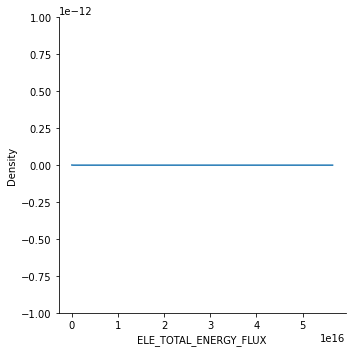

In [13]:
sns.displot(data=df,x='ELE_TOTAL_ENERGY_FLUX',kind="kde")

In [18]:
df['Year'] = df['Datetimes'].dt.year
df['Month'] = df['Datetimes'].dt.month
df['Day'] = df['Datetimes'].dt.day

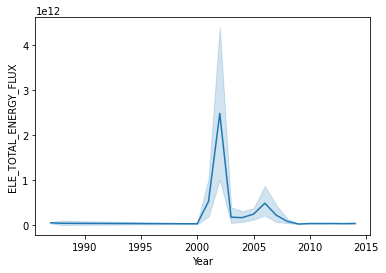

In [15]:
sns.lineplot(x='Year',y='ELE_TOTAL_ENERGY_FLUX',data=df)

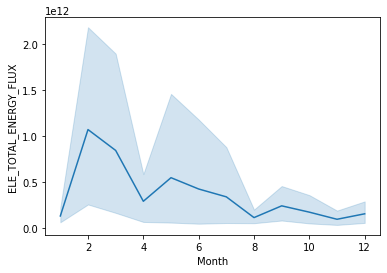

In [16]:
sns.lineplot(x='Month',y='ELE_TOTAL_ENERGY_FLUX',data=df)

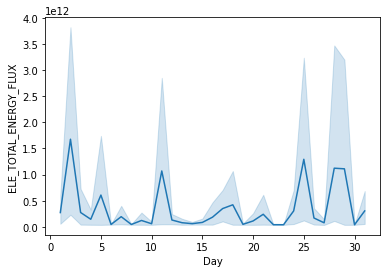

In [17]:
sns.lineplot(x='Day',y='ELE_TOTAL_ENERGY_FLUX',data=df)

In [21]:
new_df = df.drop('Datetimes',axis=1)

In [22]:
new_df.shape

(1945887, 156)

https://github.com/rmcgranaghan/precipNet/blob/master/Final__Data_Read_And_Prepare.ipynb

In [23]:
# Choose columns to drop
cols_to_drop = [c for c in new_df.columns if ('1min' in c) | ('3min' in c) | ('4min' in c) | ('_5min'in c) | ('15min' in c)| ('5hr' in c) | ('F107_' in c) | ('vx' in c) | ('AE' in c) | ('newell' in c) | ('borovsky' in c) | ('STD' in c) | ('AVG' in c) | ('SC_AACGM_LTIME'==c)]
new_df = new_df.drop(columns=cols_to_drop)

In [24]:
new_df.shape

(1945887, 76)

In [25]:
print('number of input features total = {}'.format(new_df.shape[1]))

number of input features total = 76



## Reference :

https://www.researchgate.net/publication/350946002_Toward_a_Next_Generation_Particle_Precipitation_Model_Mesoscale_Prediction_Through_Machine_Learning_a_Case_Study_and_Framework_for_Progress

#### Two final points about data preparation. 

* First, we remove observations that represent unrealistically large fluxes, deemed to be those exceeding the 99.995th percentile (equal to 7.3673E+13 [eV/cm2/s/ster] or ∼118erg/cm2/sr/s), which was empirically determined to separate values that were nonphysical. 
* Second, we combine the northern and southern hemispheres. The sun-synchronous orbits of the DMSP spacecraft restricts their MLT coverage, necessitating the combination of northern and southern hemisphere observations to com-plete the local time coverage

In [26]:
# Define the threshold above which to remove energy flux values
eflux_threshold_quantile = 99.995
eflux_threshold = .99995

# Define the conversion factor from eV to erg
erg_eV_factor = (1.60218e-12)

## Remove Outliers

In [27]:
# Remove outliers

print(new_df.shape)
threshold_drop_val = np.percentile(new_df['ELE_TOTAL_ENERGY_FLUX'],eflux_threshold_quantile)
print('... dropping rows where total electron energy flux is greater than {:.4E} [eV/cm2/s/ster]'.format(threshold_drop_val))
print('--------> number dropped = {}'.format(len( np.argwhere(new_df['ELE_TOTAL_ENERGY_FLUX'].values > threshold_drop_val) )))
#
new_df = new_df[ (new_df['ELE_TOTAL_ENERGY_FLUX'].values < threshold_drop_val) ]
print(new_df.shape)

(1945887, 76)
... dropping rows where total electron energy flux is greater than 7.3673E+13 [eV/cm2/s/ster]
--------> number dropped = 98
(1945789, 76)


## Separate features and target

In [28]:
X = new_df.drop('ELE_TOTAL_ENERGY_FLUX',axis=1)
Y = new_df['ELE_TOTAL_ENERGY_FLUX']

## Feature-engine: Drop Correlated Features

In [27]:
!pip install --quiet feature-engine

     |████████████████████████████████| 205 kB 8.0 MB/s 
     |████████████████████████████████| 9.8 MB 15.7 MB/s 


In [29]:
import feature_engine
from feature_engine.selection import DropCorrelatedFeatures

In [30]:
tr = DropCorrelatedFeatures(variables=None,method='pearson',threshold=0.8)
drop_features= tr.fit_transform(X)

In [31]:
drop_features.shape

(1945789, 42)

In [32]:
cols_to_drop = drop_features.columns.tolist()

In [33]:
cols_to_drop

['SC_AACGM_LAT',
 'ID_SC',
 'sin_ut',
 'cos_ut',
 'sin_doy',
 'cos_doy',
 'sin_SC_AACGM_LTIME',
 'cos_SC_AACGM_LTIME',
 'F107',
 'Bz',
 'By',
 'Bx',
 'AL',
 'AU',
 'SymH',
 'PC',
 'vsw',
 'psw',
 'Bz_6hr',
 'By_6hr',
 'Bx_6hr',
 'AL_6hr',
 'AU_6hr',
 'SymH_6hr',
 'PC_6hr',
 'psw_6hr',
 'Bz_3hr',
 'By_3hr',
 'Bx_3hr',
 'AL_3hr',
 'AU_3hr',
 'PC_3hr',
 'psw_3hr',
 'Bz_1hr',
 'AL_1hr',
 'AU_1hr',
 'PC_1hr',
 'PC_45min',
 'Bz_30min',
 'AL_30min',
 'Month',
 'Day']

## Final Features

In [34]:
final_features = X.drop(cols_to_drop,axis=1)

## Train Test Split

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_features,Y)

In [36]:
X_train.shape

(1459341, 33)

## Normalize the data

In [37]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [38]:
train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)
test_scaled = pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [39]:
train_scaled.head()

,vsw_6hr,SymH_3hr,vsw_3hr,By_1hr,Bx_1hr,SymH_1hr,vsw_1hr,psw_1hr,Bz_45min,By_45min,...,Bz_10min,By_10min,Bx_10min,AL_10min,AU_10min,SymH_10min,PC_10min,vsw_10min,psw_10min,Year
0,-0.619646,-0.860728,-0.850565,0.773072,-0.729182,-0.784367,-0.879239,-1.157030,-0.094431,0.695872,...,-0.127093,0.855928,-0.805692,0.749452,-1.028750,-0.595599,-0.579248,-0.849018,-1.124036,0.394572
1,-0.049995,0.354637,-0.036818,1.129384,0.828068,0.407671,-0.100234,0.158118,-0.189413,1.209632,...,0.108682,1.180088,0.264223,0.640938,-0.961452,0.370224,-0.418248,-0.060168,0.121146,0.627438
2,0.113594,-0.348995,0.324279,1.447633,0.823953,-0.612184,0.258968,-0.489664,-0.724125,1.513097,...,-0.915356,1.469706,0.556289,0.556538,-0.221183,-0.756569,0.901952,0.340040,-0.444043,0.627438
3,-0.543816,0.508157,-0.388458,-1.901325,0.266285,1.096404,-0.429901,-0.441457,-1.670424,-1.657311,...,-1.260222,-1.902089,-0.060626,-0.118658,1.304220,1.175075,1.492285,-0.379410,-0.558847,1.558904
4,1.198889,-0.553688,1.109086,-0.448107,0.122238,-0.122124,1.279232,0.941482,0.493048,-0.922607,...,1.013073,0.406887,0.118190,0.496253,-0.467940,-0.273658,-0.879782,1.161276,0.986591,1.093171


In [40]:
test_scaled.head()

,vsw_6hr,SymH_3hr,vsw_3hr,By_1hr,Bx_1hr,SymH_1hr,vsw_1hr,psw_1hr,Bz_45min,By_45min,...,Bz_10min,By_10min,Bx_10min,AL_10min,AU_10min,SymH_10min,PC_10min,vsw_10min,psw_10min,Year
0,-0.942293,0.546537,-0.982596,-0.508180,0.574957,0.394426,-1.065648,-0.414340,-0.136646,-0.342297,...,-0.049675,-0.244090,0.684440,0.604767,-0.781993,0.450709,-0.439715,-1.071099,-0.532354,-0.071161
1,-1.175979,0.584916,-1.259141,-0.041812,-0.550152,0.540120,-1.272002,-0.004581,-0.238663,-0.190565,...,-0.299526,-0.151094,-0.540448,0.737395,-0.916588,0.611679,-0.171382,-1.270046,-0.064307,0.394572
2,-0.782588,0.495363,-0.838648,0.548372,-0.646355,-0.069144,-0.842226,-0.177825,-1.128677,0.858252,...,-1.249665,0.972838,-0.218580,0.508310,-0.624966,-0.434628,0.537019,-0.816631,-0.558847,0.627438
3,-0.050365,-1.282907,-0.486630,-0.287607,-1.366075,-1.221448,-0.323081,-0.114553,-1.445283,-0.147973,...,-0.493073,0.558338,-1.330218,-3.012359,5.162592,-0.998025,4.121952,-0.277622,-0.117293,-1.468359
4,-0.448843,0.584916,-0.583099,-0.775070,0.098059,0.314957,-0.524832,-0.897917,0.039247,-0.741593,...,0.091087,-0.706417,-0.045724,0.604767,-0.692264,0.209253,-0.654382,-0.606117,-0.832610,1.558904


## Save the standarascaler trained data

In [42]:
from joblib import dump
sc_filename = "standardscaler.bin"
sc_path = os.path.join(path_dir,sc_filename)
print(sc_path)
dump(sc,sc_path)

/content/drive/MyDrive/TMLC/DMSP Particle Precipitate Flux Prediction/standardscaler.bin


['/content/drive/MyDrive/TMLC/DMSP Particle Precipitate Flux Prediction/standardscaler.bin']

## Import Keras packages

In [41]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [42]:
callbacks = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.1,
                              patience=5,
                              verbose=1,
                              mode="auto",
                              min_lr=0.001)

## Create Model

In [52]:
def create_model():
  model = Sequential()
  model.add(Dense(256, input_dim=33, activation= 'relu' ))
  model.add(Dense(256, activation= 'relu'))
  model.add(Dropout(0.3)),
  model.add(Dense(256,  activation= 'relu' ))
  model.add(Dropout(0.3)),
  model.add(Dense(1,  activation= 'linear' ))
  #compile the model 
  model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
  return model

In [53]:
model = create_model()

In [54]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 256)               8704      
                                                                 
 dense_9 (Dense)             (None, 256)               65792     
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_10 (Dense)            (None, 256)               65792     
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_11 (Dense)            (None, 1)                 257       
                                                                 
Total params: 140,545
Trainable params: 140,545
Non-tr

## Train the Model

In [55]:
history = model.fit(X_train_scaled, y_train, validation_data = (X_test_scaled,y_test),epochs=15, batch_size=40)

Epoch 1/15
36484/36484 [==============================] - 154s 4ms/step - loss: 43679567872.0000 - mean_absolute_error: 43679567872.0000 - val_loss: 42980958208.0000 - val_mean_absolute_error: 42980958208.0000
Epoch 2/15
36484/36484 [==============================] - 152s 4ms/step - loss: 43672432640.0000 - mean_absolute_error: 43672432640.0000 - val_loss: 42979983360.0000 - val_mean_absolute_error: 42979983360.0000
Epoch 3/15
36484/36484 [==============================] - 169s 5ms/step - loss: 43671568384.0000 - mean_absolute_error: 43671568384.0000 - val_loss: 42979586048.0000 - val_mean_absolute_error: 42979586048.0000
Epoch 4/15
36484/36484 [==============================] - 150s 4ms/step - loss: 43671502848.0000 - mean_absolute_error: 43671502848.0000 - val_loss: 42979303424.0000 - val_mean_absolute_error: 42979303424.0000
Epoch 5/15
36484/36484 [==============================] - 149s 4ms/step - loss: 43671080960.0000 - mean_absolute_error: 43671080960.0000 - val_loss: 42979024896

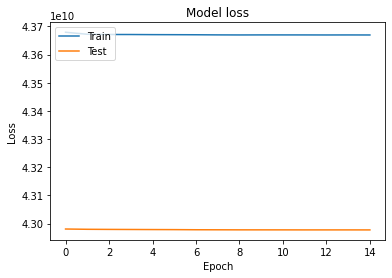

In [56]:
 plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
y_pred = model.predict(X_test_scaled, batch_size=1, verbose=1)

266006/486448 [===============>..............] - ETA: 6:56